# Data Analysis

# Importing Modules

In [1]:
%load_ext autotime
import pandas as pd
import seaborn as sn
import missingno as misn
import explorationhelp as exph
import matplotlib.pyplot as plt

time: 2.3 s (started: 2022-01-27 11:00:08 +05:30)


# Importing Data

In [2]:
con_com = pd.read_csv('complaints.csv')

C:\Users\krsid\anaconda3\envs\comp_classify\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


time: 17.4 s (started: 2022-01-27 11:00:18 +05:30)


# Data Exploration and Preprocessing

## Overall View of the data

In [5]:
con_com.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640.0,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854.0,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067.0,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2019-08-26,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33194.0,NaN,NaN,Referral,2019-08-27,Closed with explanation,Yes,NaN,3355681
4,2021-02-22,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,On XX/XX/2019 my bill did not go through accou...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,32541.0,NaN,Consent provided,Web,2021-02-22,Closed with explanation,Yes,NaN,4157111


time: 16 ms (started: 2022-01-26 15:00:01 +05:30)


Looking at the above snap of the available data:
- Product is the target variable
- Sub-product provides a better understanding of the categories in Product
- Consumer complaint narrative is what we need to classify

We will create a new dataframe with only the required variables

In [6]:
# Keeping only the relavent variables
con_com_use = con_com[['Product', 'Sub-product', 'Consumer complaint narrative']]
con_com_use.head()

,Product,Sub-product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,NaN
1,Vehicle loan or lease,Loan,I contacted Ally on Friday XX/XX/XXXX after fa...
2,"Credit reporting, credit repair services, or o...",Credit reporting,NaN
3,Checking or savings account,Checking account,NaN
4,Credit card or prepaid card,General-purpose credit card or charge card,On XX/XX/2019 my bill did not go through accou...


time: 62 ms (started: 2022-01-26 15:00:01 +05:30)


Taking a look at the missing values

## Missing Values

In [7]:
print(con_com_use.shape)
print((pd.isnull(con_com_use).sum()/con_com_use.shape[0])*100)

(2374711, 3)
Product                          0.000000
Sub-product                      9.902847
Consumer complaint narrative    65.089226
dtype: float64
time: 281 ms (started: 2022-01-26 15:00:01 +05:30)


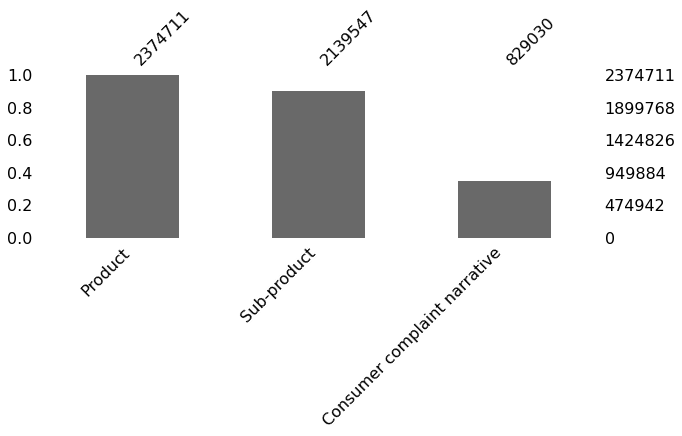

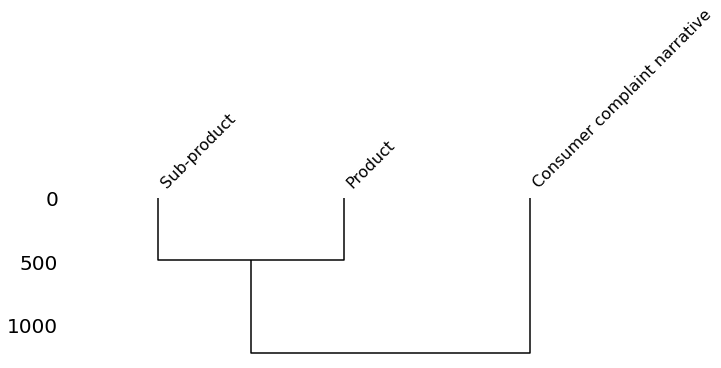

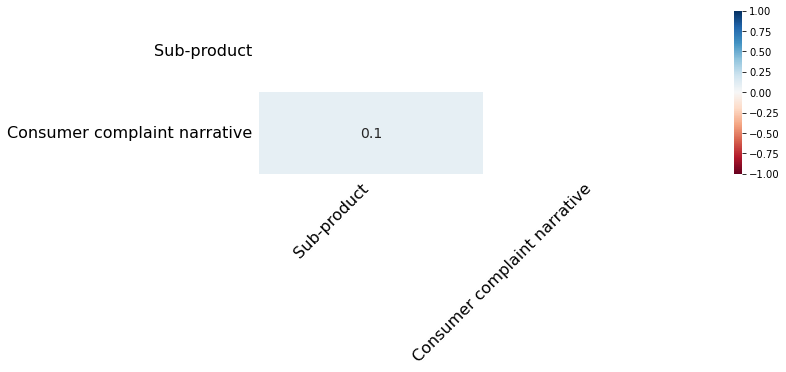

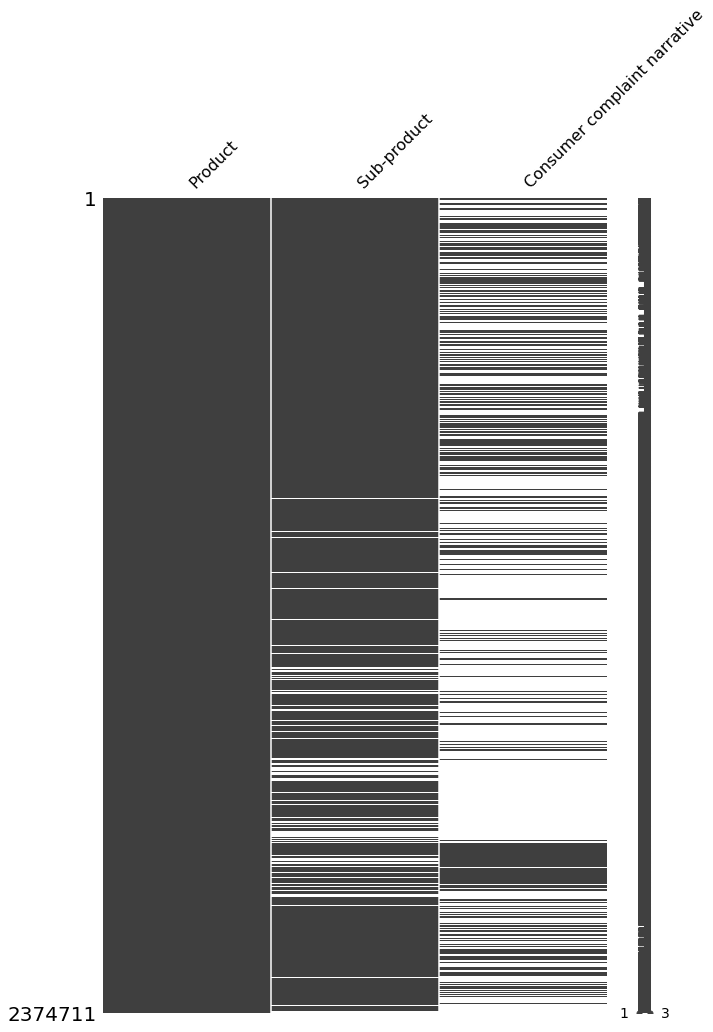

time: 3.7 s (started: 2022-01-26 15:00:02 +05:30)


In [8]:
# Visualizing the missing values and their relationship across variables
misn.bar(con_com_use, figsize=(10,3));
misn.dendrogram(con_com_use, figsize=(10,3));
misn.heatmap(con_com_use, figsize=(10,3));
misn.matrix(con_com_use, figsize=(10,15));

In [9]:
# Droping missing observations from consumer complaint narrative
con_com_use = con_com_use[pd.notnull(con_com_use['Consumer complaint narrative'])]

time: 172 ms (started: 2022-01-26 15:00:06 +05:30)


In [10]:
print(con_com_use.shape)
print((pd.isnull(con_com_use).sum()/con_com_use.shape[0])*100)

(829030, 3)
Product                         0.000000
Sub-product                     6.293138
Consumer complaint narrative    0.000000
dtype: float64
time: 141 ms (started: 2022-01-26 15:00:06 +05:30)


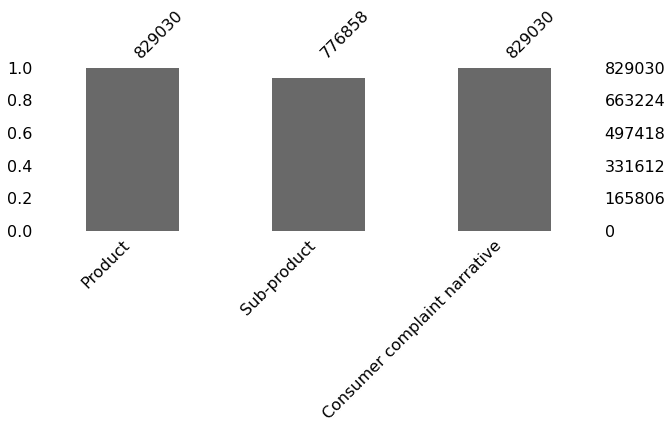

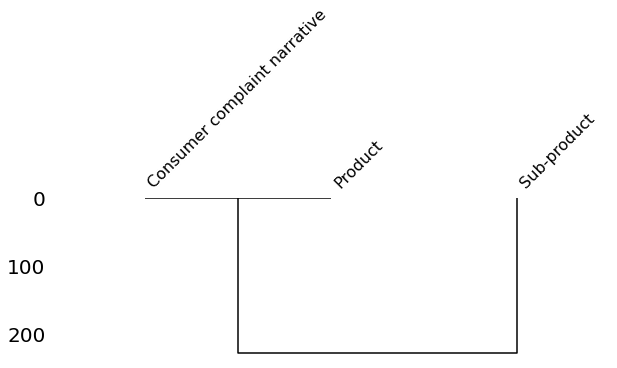

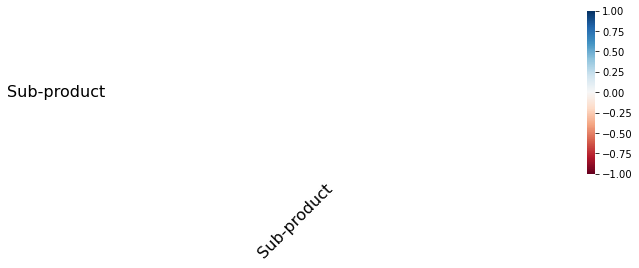

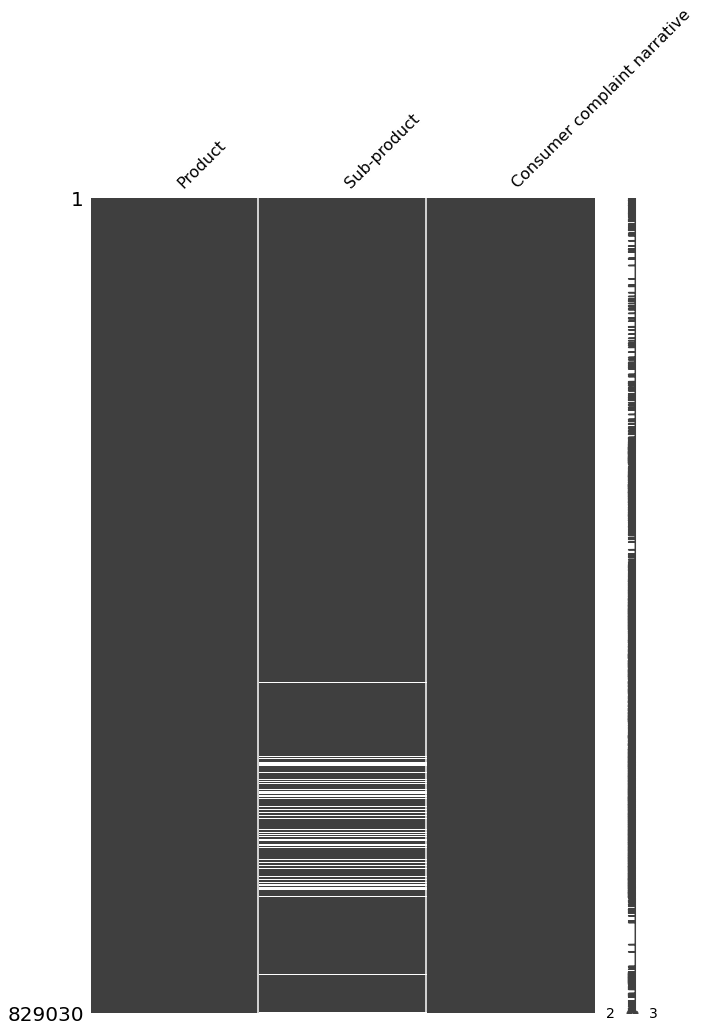

time: 1.72 s (started: 2022-01-26 15:00:06 +05:30)


In [11]:
misn.bar(con_com_use, figsize=(10,3));
misn.dendrogram(con_com_use, figsize=(10,3));
misn.heatmap(con_com_use, figsize=(10,3));
misn.matrix(con_com_use, figsize=(10,15));

## Data distribution

Product


,Product,Frequency,Percentage
0,"Credit reporting, credit repair services, or o...",326828,39.4
1,Debt collection,160799,19.4
2,Mortgage,85766,10.3
3,Credit card or prepaid card,62540,7.5
4,Checking or savings account,38576,4.7
5,Credit reporting,31588,3.8
6,Student loan,29321,3.5
7,"Money transfer, virtual currency, or money ser...",19244,2.3
8,Credit card,18838,2.3
9,Vehicle loan or lease,15521,1.9


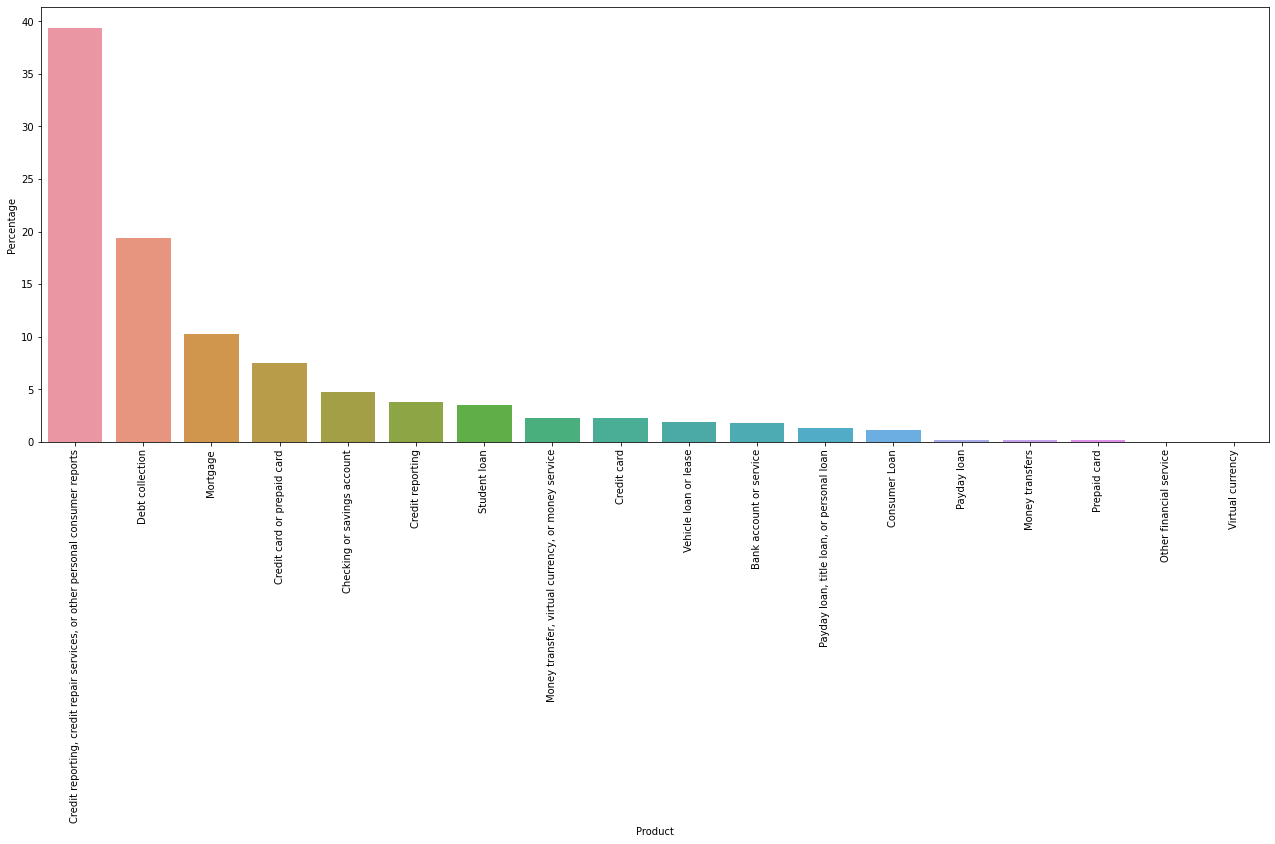




Sub-product


,Sub-product,Frequency,Percentage
0,Credit reporting,321016,41.3
1,General-purpose credit card or charge card,46698,6.0
2,Checking account,41981,5.4
3,Other debt,33618,4.3
4,Conventional home mortgage,32743,4.2
...,...,...,...
70,Credit repair,39,0.0
71,Traveler’s/Cashier’s checks,22,0.0
72,Transit card,19,0.0
73,Student prepaid card,11,0.0


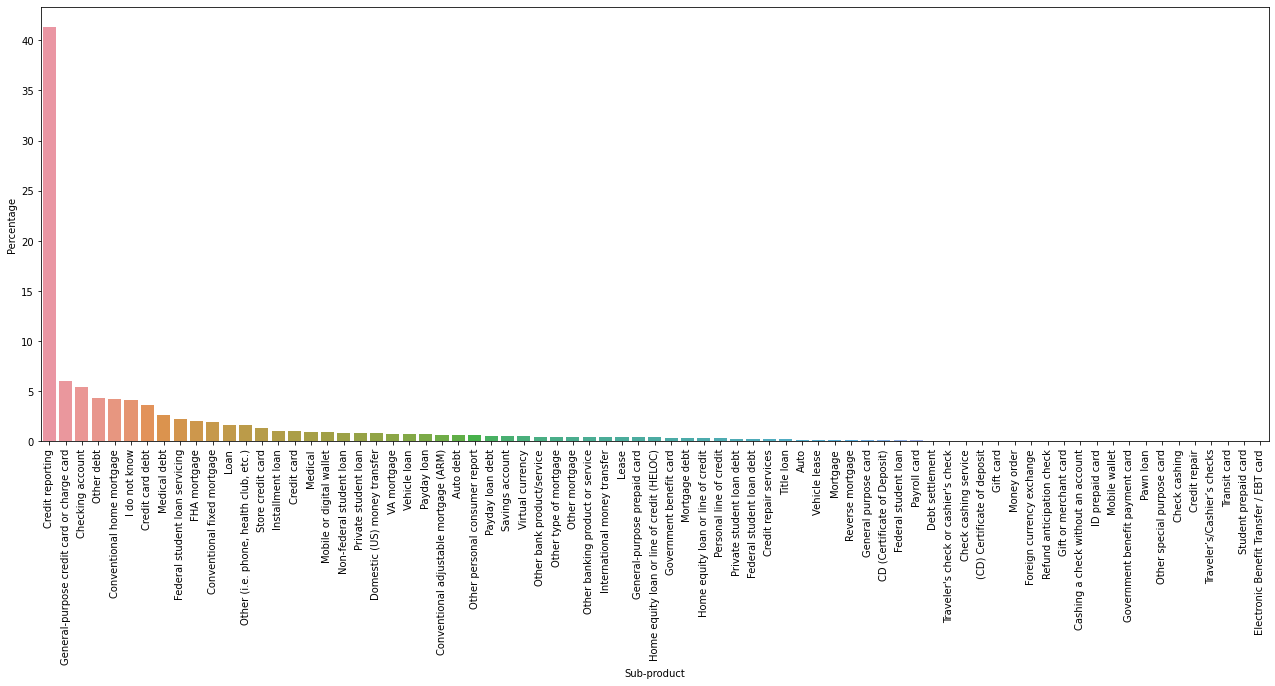




Consumer complaint narrative


,Consumer complaint narrative,Frequency,Percentage
0,There are many mistakes appear in my report wi...,1035,0.1
1,I am a victim of identity theft/fraud. I have ...,842,0.1
2,My credit profile is inaccurate which is not f...,730,0.1
3,ATTN Collections Dept I am submitting a compla...,691,0.1
4,The credit bureaus are reporting inaccurate/ou...,552,0.1
...,...,...,...
744074,Experian has to be the most adverse credit rep...,1,0.0
744075,I cancelled a newspaper subscription back in X...,1,0.0
744076,"XXXX XXXX XXXX XXXX XXXX XXXX, TX XXXX '' Pl...",1,0.0
744077,On XX/XX/XXXX I contacted Enhanced Recovery Co...,1,0.0





time: 3.8 s (started: 2022-01-26 15:00:08 +05:30)


In [12]:
for i in range(len(con_com_use.columns)):
    print(con_com_use.columns[i])
    dist_tmp = distTab(con_com_use, con_com_use.columns[i])
    display(dist_tmp)
    if dist_tmp.shape[0]<=80:
        f, ax = plt.subplots(figsize=(22,8))
        sn.barplot(x=con_com_use.columns[i],y="Percentage",data=dist_tmp)
        plt.xticks(range(len(dist_tmp[con_com_use.columns[i]])), dist_tmp[con_com_use.columns[i]], rotation='vertical')
        plt.show()
    print('\n\n')

Observation from the distribution table:
- We have 18 categories for consumer complaints
- We have a highly imbalanced dataset
- Duplicate categories are present. For example categories such as 'Credit reporting' is present as a combined as well as a seperate category.
- 8,29,030 is the total number of available observations and the unique values present in the Consumer complaint narrative is 7,44,076. Which means there can be duplicates overall.

## Duplicate values

In [13]:
print((sum(con_com_use.duplicated())/con_com_use.shape[0])*100)

10.076233670675368
time: 2.3 s (started: 2022-01-26 15:00:11 +05:30)


10% of the data is duplicate in the data which we have after removal of the missing values.

We will drop all the duplicate values.

In [14]:
con_com_use = con_com_use[~con_com_use.duplicated()]
con_com_use.reset_index(drop=True, inplace=True)
con_com_use.shape

(745495, 3)

time: 2.25 s (started: 2022-01-26 15:00:14 +05:30)


Final observation size is 7,44,722.

Let's take look at the full name of the categories to understand which are the duplicate ones.

## Preprocessing Target Variable

In [15]:
set(con_com_use.Product.tolist())

{'Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Money transfers',
 'Mortgage',
 'Other financial service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease',
 'Virtual currency'}

time: 16 ms (started: 2022-01-26 15:00:16 +05:30)


Categories which can be combined:
- 'Credit card' and 'Prepaid card' can be combined with 'Credit card or prepaid card'.
- 'Credit reporting',can be combined with 'Credit reporting, credit repair services, or other personal consumer reports'
- 'Money transfers' and 'Virtual currency' can be combined with 'Money transfer, virtual currency, or money service'
- 'Payday loan' can be combined with 'Payday loan, title loan, or personal loan'




We will try to understand the categories in 'Products' better with a cross tab with the 'Sub-products'.

In [16]:
pd.set_option('display.max_rows', 500) # increase max row view size
display(pd.crosstab(con_com_use['Sub-product'], con_com_use['Product']))
pd.set_option('display.max_rows', 10) # decrease max row view size

Product,Bank account or service,Checking or savings account,Consumer Loan,Credit card or prepaid card,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Money transfers,Mortgage,Other financial service,"Payday loan, title loan, or personal loan",Prepaid card,Student loan,Vehicle loan or lease,Virtual currency
Sub-product,,,,,,,,,,,,,,,
(CD) Certificate of deposit,273,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Auto,0,0,0,0,0,1041,0,0,0,0,0,0,0,0,0
Auto debt,0,0,0,0,0,4772,0,0,0,0,0,0,0,0,0
CD (Certificate of Deposit),0,579,0,0,0,0,0,0,0,0,0,0,0,0,0
Cashing a check without an account,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Check cashing,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0
Check cashing service,0,0,0,0,0,0,286,0,0,0,0,0,0,0,0
Checking account,10102,31834,0,0,0,0,0,0,0,0,0,0,0,0,0
Conventional adjustable mortgage (ARM),0,0,0,0,0,0,0,0,4972,0,0,0,0,0,0


time: 203 ms (started: 2022-01-26 15:00:16 +05:30)


Understanding overlap between Consumer loan and Vehicle loan

In [17]:
list(set(con_com_use[(con_com_use['Product']=='Consumer Loan') & (con_com_use['Sub-product']=='Vehicle loan')]['Consumer complaint narrative'].tolist()))[:5]

["I 'm filing a complaint because I have continually received false information, been misled, harassed and threatened by various Prestige Financial account managers. I have also been refused the opportunity to speak to a manager & I was refused the address to send a written complaint. XXXX XXXX advised I could only send it electronically. \nI received this loan because I was in a current Ch XXXX due to a major reduction in income due to the XXXX. Shortly after receiving the loan, my company decided to lay off and relocate apart of the business. I was forced to take another cut in salary. I have communicated every detail of my situation to my previous account manager XXXX XXXX. In XXXX XXXX notified me that my account manager was changing. Eventually, XXXX XXXX became my account manager things went smoothly until I needed repairs and I received a major bill from the IRS. XXXX advised all of my extenstions had been utilized and she could put me on a XXXX program to help me out. Each text

time: 78 ms (started: 2022-01-26 15:00:16 +05:30)


Understanding overlap between Consumer loan and Personal line of credit

In [18]:
list(set(con_com_use[(con_com_use['Product']=='Consumer Loan') & (con_com_use['Sub-product']=='Personal line of credit')]['Consumer complaint narrative'].tolist()))[:5]

['I took out a personal loan from Wells Fargo in XXXX of XXXX. I have been receiving letters from them for close to a year, asserting that I am behind by XXXX payments. My payment, per month is {$210.00}. By their calculations I now owe a total of {$1500.00}, which includes unpaid late charges of {$740.00}. I sent XXXX copies of my checking account statements, showing the payments were made. I have been unable to resolve this issue, with the most recent correspondence, from XXXX XXXX, XXXX XXXX XXXX - XXXX, stating that XXXX payment on XXXX XXXX, XXXX was made and applied completely to interest, as " no payments had been made for three months prior. \'\' She never addressed the copies of my statements showing proof of my " missing payments \'\'. I have been to the branch office in XXXX XXXX, PA, but to no avail. They state they can not do anything about it, that I must call the company directly, which I have done numerous, numerous times. I would appreciate any assistance that you coul

time: 79 ms (started: 2022-01-26 15:00:16 +05:30)


Looking at the above table and filtered Consumer copmplaint narrative, we can:
- Combine 'Other financial service' and 'Money transfer, virtual currency, or money service'
- Combine 'Consumer loan', 'Vehicle loan or lease' and 'Payday loan, title loan, or personal loan'
- Combine 'Bank account or service' and 'Checking or savings account'

- XXXX is used for masking of details

In [19]:
con_com_use['Product'].replace({'Credit card': 'Credit card or prepaid card',
                                'Prepaid card': 'Credit card or prepaid card',
                                'Credit reporting':'Credit reporting, credit repair services, or other personal consumer reports',
                                'Money transfers':'Money transfer, virtual currency, or money service',
                                'Virtual currency':'Money transfer, virtual currency, or money service',
                                'Payday loan':'Consumer loan, Vehicle loan or lease, Payday loan, title loan, or personal loan',
                                'Other financial service': 'Money transfer, virtual currency, or money service',
                                'Consumer Loan':'Consumer loan, Vehicle loan or lease, Payday loan, title loan, or personal loan',
                                'Vehicle loan or lease':'Consumer loan, Vehicle loan or lease, Payday loan, title loan, or personal loan',
                                'Payday loan, title loan, or personal loan':'Consumer loan, Vehicle loan or lease, Payday loan, title loan, or personal loan',
                                'Bank account or service':'Bank account or service, Savings account',
                                'Checking or savings account':'Bank account or service, Savings account'}, inplace=True)

time: 188 ms (started: 2022-01-26 15:00:16 +05:30)


,Product,Frequency,Percentage
0,"Credit reporting, credit repair services, or o...",284166,38.1
1,Debt collection,153541,20.6
2,Mortgage,85663,11.5
3,Credit card or prepaid card,81689,11.0
4,"Bank account or service, Savings account",53407,7.2
5,"Consumer loan, Vehicle loan or lease, Payday l...",37075,5.0
6,Student loan,29189,3.9
7,"Money transfer, virtual currency, or money ser...",20765,2.8


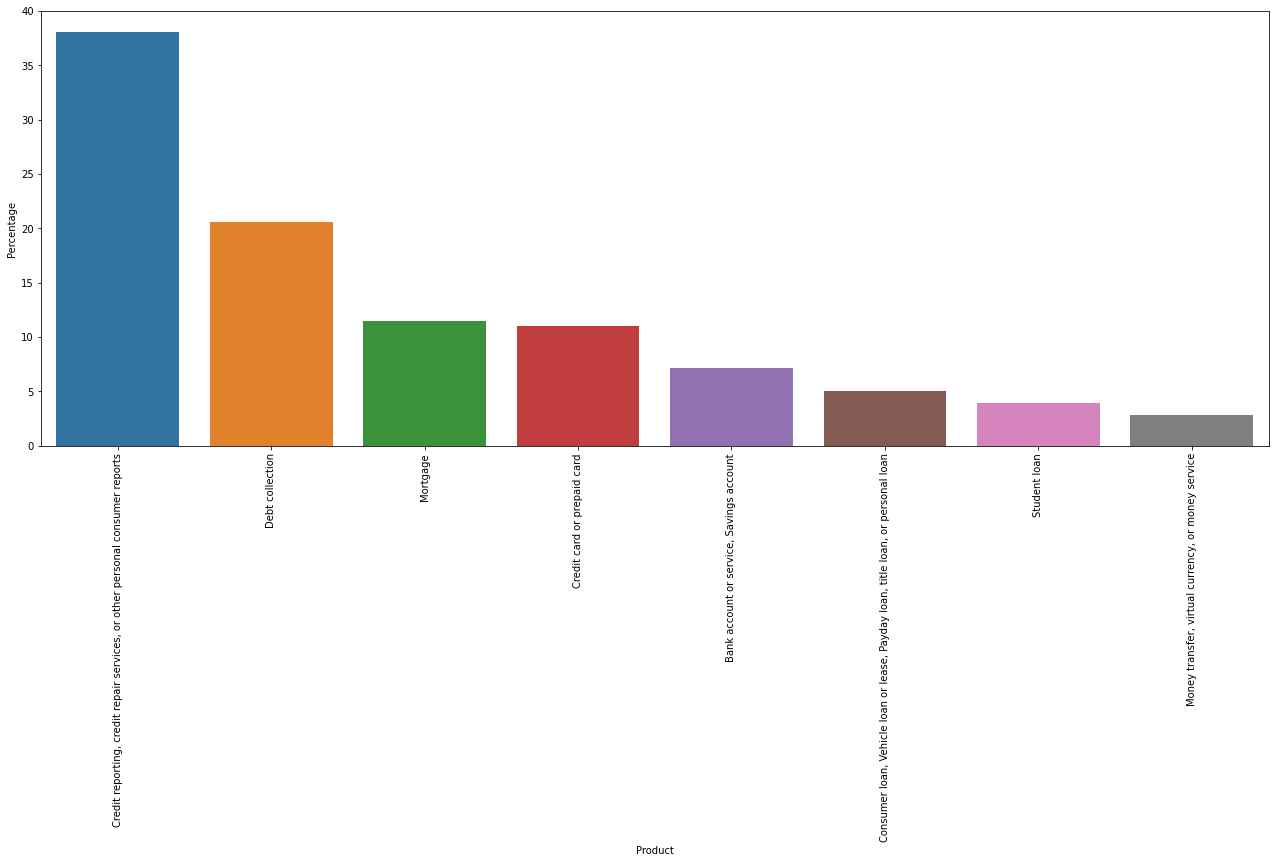

time: 281 ms (started: 2022-01-26 15:00:17 +05:30)


In [20]:
dist_tmp = distTab(con_com_use,'Product')
display(dist_tmp)
f, ax = plt.subplots(figsize=(22,8))
sn.barplot(x='Product',y="Percentage",data=dist_tmp)
plt.xticks(range(len(dist_tmp['Product'])), dist_tmp['Product'], rotation='vertical')
plt.show()

- Number of categories is now 8 but the dataset is still highly imbalanced
- We can drop Sub-product now

In [21]:
con_com_use.drop(['Sub-product'], axis=1, inplace=True)

time: 31 ms (started: 2022-01-26 15:00:17 +05:30)


# Conclusion

<ol>
    <li> Only columns <b>'Consumer complaint narrative'</b> and <b>'Product'</b> are needed. </li>
    <li> All observations with missing value in the varibale <b>'Consumer complaint narrative'</b> needs to be removed. </li>
    <li> All duplicate observations in the dataframe needs to be removed. </li>
    <li> Target variable 'Product' needs to be remapped based on the analysis done. </li>
    <li> After the above steps, data will be ready for model-specific-preprocessing and modeling. </li>
</ol>